# PROCESADO DEL CSV ORIGINAL DE KAGGLE PARA SACAR EL CSV TRAIN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargamos los datos de entrada del archivo .csv Train

In [3]:
# Cargamos los datos de entrada del archivo Train.csv
train = pd.read_csv('../data/Raw/train.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- **PassengerId** : una identificación única para cada pasajero. Cada Id toma la forma gggg_pp donde gggg indica un grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.
- **HomePlanet** : el planeta del que partió el pasajero, normalmente su planeta de residencia permanente.
- **CryoSleep** :  indica si el pasajero eligió ponerse en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.
- **Cabin** : el número de cabina donde se hospeda el pasajero. Toma la forma cubierta/número/lado, donde lado puede ser P para babor o S para estribor.
- **Destination** : el planeta dónde desembarcará el pasajero.
- **Age** : la edad del pasajero.
- **VIP** : si el pasajero ha pagado por un servicio VIP especial durante el viaje.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship df_train.
- **Name** : el nombre y apellido del pasajero.
- **Transported** : si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


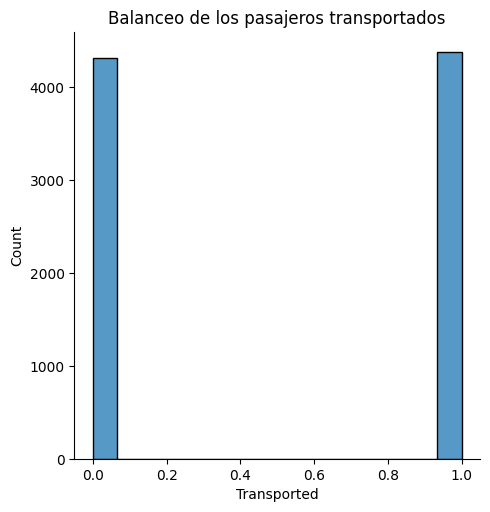

In [4]:
sns.displot(df_train['Transported'])
plt.title("Balanceo de los pasajeros transportados");

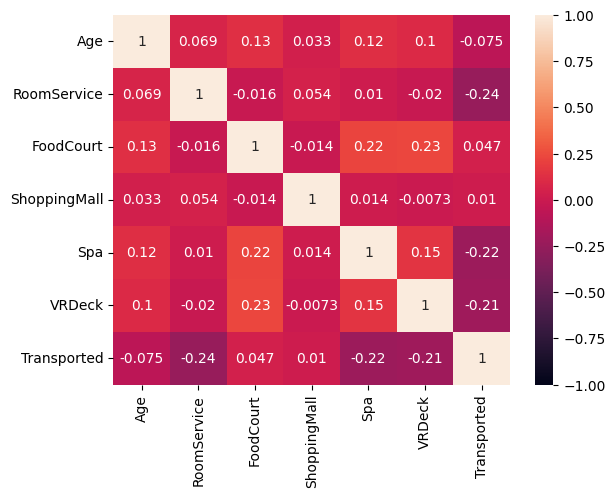

In [5]:
sns.heatmap(df_train.corr(), vmin = -1, vmax = 1, annot = True);

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

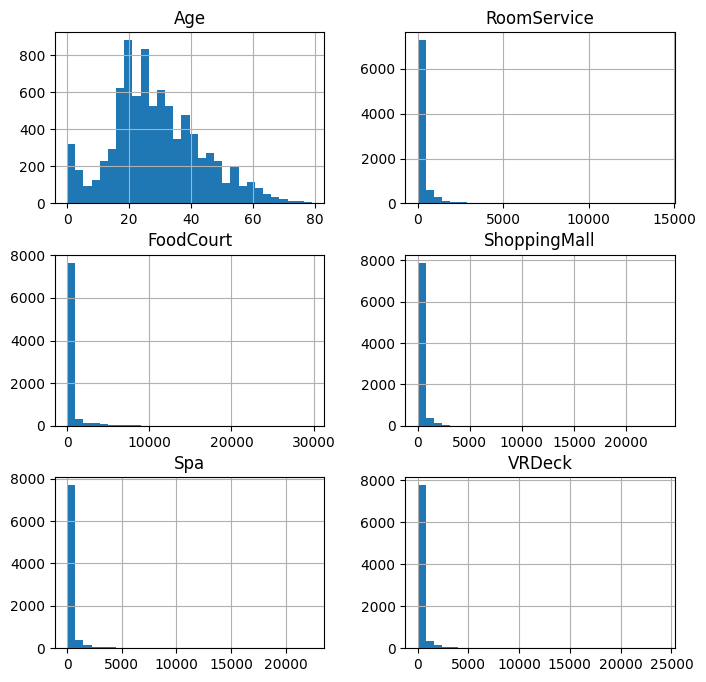

In [6]:
df_train.hist(bins= 30, figsize=(8,8))

In [7]:
#comprobamos los valors nulos
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
# Porcentaje de valores nulos
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


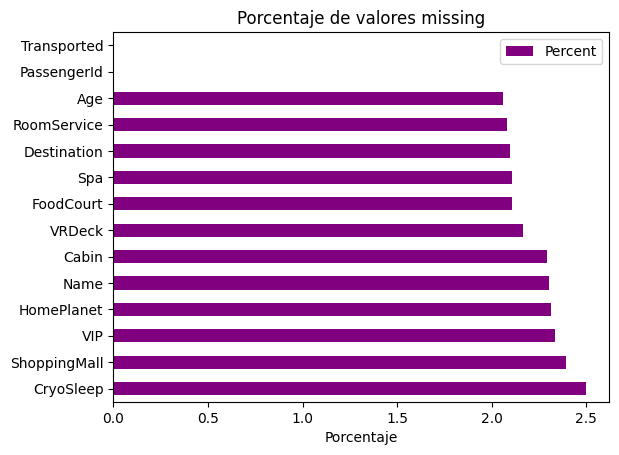

In [9]:
# Grafico de valores nulos
missing_data[['Percent']].plot(kind = 'barh', color = 'purple')
plt.title("Porcentaje de valores missing")
plt.xlabel("Porcentaje");

- HomePlanet : en esta variable rellenamos aquellos datos missing con el planeta de origen del pasajero más común entre ellos, para ello vemos que planetas hay y posteriormente calculamos la moda.

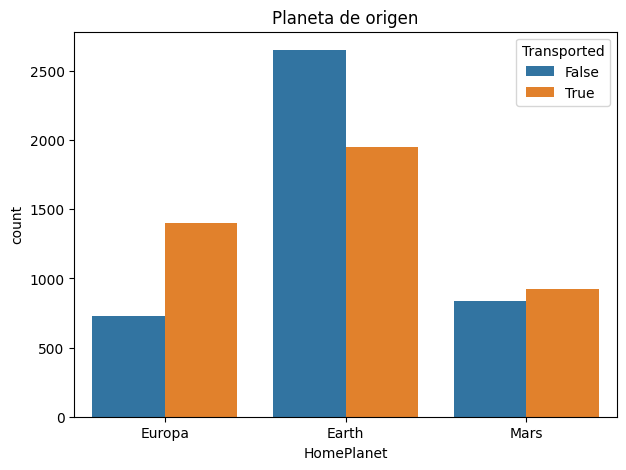

In [10]:
plt.figure(figsize = (7,5))
sns.countplot(data = df_train, x = 'HomePlanet', hue = 'Transported')
plt.title("Planeta de origen");

In [11]:
#HomePlanet : en esta variable rellenamos aquellos datos missing con el planeta de origen del pasajero más común entre ellos, 
# para ello vemos que planetas hay y posteriormente calculamos la moda.

df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0], inplace = True)

- Cryosleep: para estos valores perdidos nos centramos en dos opciones : 
  
  - Si un pasajero tiene un gasto distinto de cero en cualquier categoría de gasto, supondremos que este pasajero no esta confinado en su cabina, por tanto rellenamos con un False.
  
  - Si un pasajero tiene un gasto de cero en todas las categorías de gastos, este pasajero estará en animación suspendida en su cabina, por tanto rellenamos con un True.

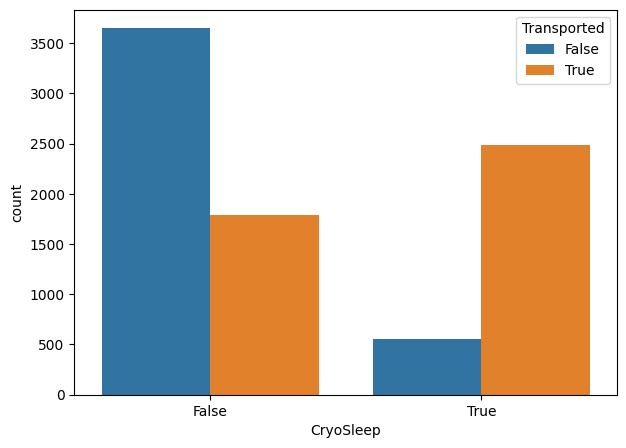

In [12]:
plt.figure(figsize = (7,5))
sns.countplot(data = df_train, x = 'CryoSleep', hue = 'Transported');

In [13]:
bill_colum = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

mask = (df_train.CryoSleep.isna())&((df_train[bill_colum]>0).any(1))
df_train.loc[:,'CryoSleep'][mask] = False
df_train.loc[:,'CryoSleep'][df_train.loc[:,'CryoSleep'].isna()]= True

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- Missing Bills: completamos todas las facturas faltantes con 0. Tenemos en cuenta que aproximadamente la mitad de las personas a las que les falta alguna factura estan en modo crionizados, por lo que necesariamente tienen que tener en todas sus facturas un importe de 0.

In [14]:
df_train.loc[:,'RoomService'][df_train.loc[:,'RoomService'].isna()]= 0.0
df_train.loc[:,'FoodCourt'][df_train.loc[:,'FoodCourt'].isna()]= 0.0
df_train.loc[:,'ShoppingMall'][df_train.loc[:,'ShoppingMall'].isna()]= 0.0
df_train.loc[:,'Spa'][df_train.loc[:,'Spa'].isna()]= 0.0
df_train.loc[:,'VRDeck'][df_train.loc[:,'VRDeck'].isna()]= 0.0

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

- Cabin : en esta variable rellenamos los missing con la cabina más popular entre los pasajeros. Los datos de cabina vienen dados de la forma cubierta/número/lado, donde lado puede ser P para babor o S para estribor, en mi caso me quedo solo con la informacion de si el pasajero se encuentra en babor o estribor, eliminando así la información adicional. Crearemos así una nueva columna con P o S, eliminando la columna Cabin.

In [15]:
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace = True)
df_train['Cabin']= df_train['Cabin'].astype('string')

In [16]:
#Relleno los campos con valores nulos, con la mediana de cada columna
# df_train=df_train.fillna(df_train.median())
# df_train['Cabin']= df_train['Cabin'].astype('string')
# df_train['New_Cabin'] = df_train['Cabin'].apply(lambda x: x[-1])
# df_train = df_train.drop(['Cabin'], axis= 1)

- VIP: la mayoría de los pasajeros no tienen contratados los servicios VIP, por lo que rellemos estos datos perdidos con un False.

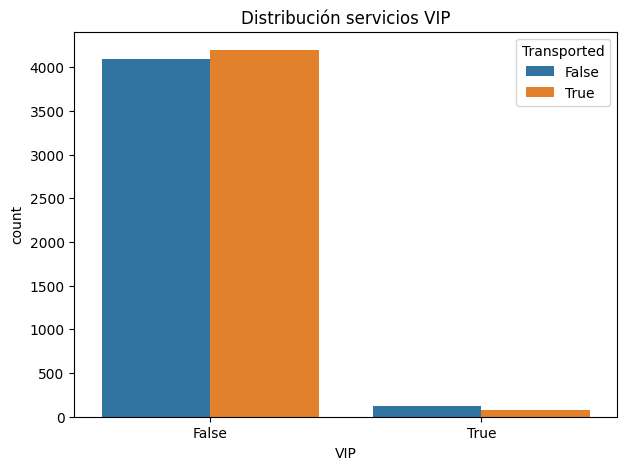

In [17]:
plt.figure(figsize = (7,5))
sns.countplot(data = df_train, x = 'VIP', hue = 'Transported')
plt.title("Distribución servicios VIP");

In [18]:
df_train.loc[:,'VIP'][df_train.loc[:,'VIP'].isnull()]= False

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- Age: para esta variable numérica rellenamos aquellos valores missing con la edad mediana de los pasajeros.

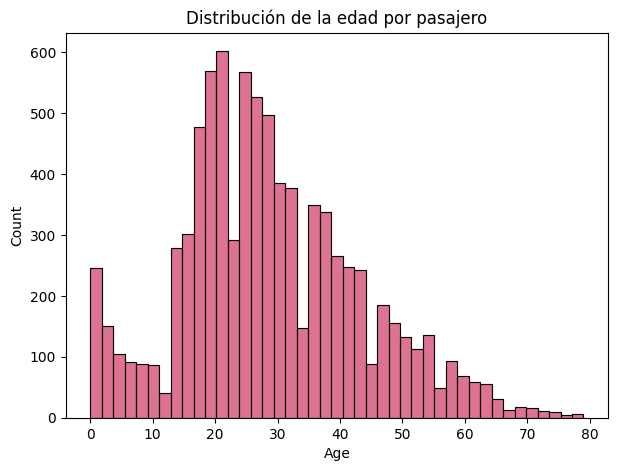

In [19]:
plt.figure(figsize=(7,5))
sns.histplot(df_train.Age, color=sns.color_palette('magma')[3])
plt.title("Distribución de la edad por pasajero")
plt.show()

In [20]:
edad_mediana = df_train['Age'].median()
edad_media = df_train['Age'].mean()

print("Edad Mediana:", edad_mediana)
print("Edad Mediana:", edad_media)

Edad Mediana: 27.0
Edad Mediana: 28.82793046746535


In [21]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)

In [22]:
# Hay 2 opciones en la columna 'HomePlanet'. Como son campos de tipo object, osea, string, los paso a 0 ó 1 con el metodo getdummies y los guardo en un dataframe temporal.
planetas=pd.get_dummies(df_train['HomePlanet'])
planetas

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


In [23]:
df_train=pd.concat([df_train, planetas], axis=1)

In [24]:
# Separo la columna cabin en 3 para crear mas tarde 3 nuevas columnas con sus correspondientes valores sacados de esta
df_train['Cabin_Side'] = df_train['Cabin'].str.split("/").str[2]
df_train['Cabin_num'] = df_train['Cabin'].str.split("/").str[1]
df_train['Cabin_Deck'] = df_train['Cabin'].str.split("/").str[0]

In [25]:
# Separo la columna 'Cabin_Side' en 2, porq tiene 2 valores,P y S y las guardo 
cabinas = pd.get_dummies(df_train['Cabin_Side'], prefix='Cabin_Side')
df_train=pd.concat([df_train, cabinas], axis=1)

In [26]:
# Convertimos la columna Cabin_deck a numerica con getdummies y la guardo en columnas individuales separadas
cabinas = pd.get_dummies(df_train['Cabin_Deck'], prefix='Cabin_Deck')
df_train=pd.concat([df_train, cabinas], axis=1)

In [27]:
# El campo 'Cabin_num', tiene valores . Lo relleno provisionalmente cn nueves y despues con NAN que son valores nulos pero de typo Float :)
# df_train['Cabin_num']=df_train['Cabin_num'].fillna('-99999999')
# df_train['Cabin_num'].replace({"-99999999": np.nan})
# df_train['Cabin_num'].value_counts

In [28]:
#Borramos las columnas que he ido trasformando y que ya no me sirven
df_train.drop('Cabin_Side', axis=1, inplace=True)
df_train.drop('HomePlanet', axis=1, inplace=True)
df_train.drop('Destination', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Cabin',axis=1, inplace=True)
df_train.drop('Cabin_Deck',axis=1, inplace=True)

#Transformamos la columna VIP, q esta cm string a tipo int
df_train['VIP'] = df_train['VIP'].replace({False: 0, True: 1}).astype(int)
df_train['Cabin_num']=df_train['Cabin_num'].astype(int)

#Transformamos la columna CryoSleep, q esta cm string a tipo int
df_train['CryoSleep'] = df_train['CryoSleep'].replace({False: 0, True: 1}).astype(int)
df_train['Cabin_num']=df_train['Cabin_num'].astype(int)

In [29]:
# Ahora si...ataframe limpio de valores nulos y sin tipos de campos String o Object oncompatibles a la hora de crear el modelo y entrenarlo
df_train.isnull().sum()

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Earth           0
Europa          0
Mars            0
Cabin_num       0
Cabin_Side_P    0
Cabin_Side_S    0
Cabin_Deck_A    0
Cabin_Deck_B    0
Cabin_Deck_C    0
Cabin_Deck_D    0
Cabin_Deck_E    0
Cabin_Deck_F    0
Cabin_Deck_G    0
Cabin_Deck_T    0
dtype: int64

In [30]:
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [31]:
# Ahora si, todas las features que voy a entrenar son de typo numerico o bool y sin nulos
df_train.dtypes

PassengerId      object
CryoSleep         int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Earth             uint8
Europa            uint8
Mars              uint8
Cabin_num         int32
Cabin_Side_P      uint8
Cabin_Side_S      uint8
Cabin_Deck_A      uint8
Cabin_Deck_B      uint8
Cabin_Deck_C      uint8
Cabin_Deck_D      uint8
Cabin_Deck_E      uint8
Cabin_Deck_F      uint8
Cabin_Deck_G      uint8
Cabin_Deck_T      uint8
dtype: object

## guardamos en un nuevo CSV todos los datos ya procesados para poder usarlos en los notebooks de los modelos

In [32]:
df_train.to_csv('../data/Processed/train_processed.csv', sep=',', index=False)